<a href="https://colab.research.google.com/github/Luan-hmm/Notas_desafios/blob/master/resolucao_mercantil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Banco Mercantil

**Objetivo:**


*   Refazer dados da apresentação
*   Atualizar com informações importantes
*   Criar conclusão





In [ ]:
#monta conexão com arquivos do google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#bibliotecas utilizadas para criação de codigo

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#variavel caminho do arquivo usado como dados
path_dados_mercantil = '/content/drive/MyDrive/solucao_mercantil/Deasafio Mar Aberto - Dados (2).xlsx'

#Carregamento dos arquivos
df_realizado = pd.read_excel(path_dados_mercantil, sheet_name='Realizado', header=1, na_filter=False, date_format={'Data': '%Y-%m-%d'})
df_meta = pd.read_excel(path_dados_mercantil, sheet_name='Meta', header=1, na_filter=False, date_format={'Data': '%Y-%m-%d'})

In [ ]:
#removendo colunas vazias
df_realizado = df_realizado.drop(columns=['Unnamed: 0'])
df_meta = df_meta.drop(columns=['Unnamed: 0'])
#selecionando somente ano 2024
df_realizado = df_realizado[df_realizado['Ano'] != 2024]

#Visão mesal de originação

In [ ]:
df_realizado

,Ano,Mês,Data,Produto,Cliente,Taxa,Prazo Atual,Parcelas Pagas,IF,PMT,Saldo Devedor Inicial,Saldo Devedor Atual
0,2023,10,2023-10-15,Cartão,609,0.0150,69,15,99,204.47,9728.403092,8751.764792
1,2023,2,2023-02-09,Cartão,387,0.0176,18,66,197,250.92,10964.162230,3842.404097
2,2023,9,2023-09-27,Cartão,396,0.0187,27,57,44,563.24,23767.030230,11855.545610
3,2023,8,2023-08-04,Seguro,43,0.0180,2,82,107,273.32,11791.431200,532.227141
4,2023,6,2023-06-30,Cartão,214,0.0095,73,11,36,447.39,25810.749550,23477.970900
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,11,2023-11-13,Crédito Pessoal,956,0.0182,84,0,55,436.07,18693.596910,18693.596910
996,2023,9,2023-09-26,Cartão,956,0.0110,81,3,98,202.76,11079.253840,10833.910120
997,2023,8,2023-08-08,Seguro,146,0.0127,69,15,129,160.18,8243.251489,7332.662164
998,2023,2,2023-02-19,Crédito Pessoal,777,0.0198,70,14,25,128.34,5233.181171,4838.785090


In [ ]:
#agrupamento por mes em relação a saldo e quantidade

df_realizado_mes = df_realizado.groupby('Mês').agg(Realizado=('Saldo Devedor Inicial','sum'), Quantidade=('Saldo Devedor Inicial','count'))
df_realizado_mes

,Realizado,Quantidade
Mês,,
1,1.494930e+06,92
2,1.309148e+06,81
3,1.501585e+06,88
4,1.327445e+06,85
5,1.348825e+06,85
6,1.416776e+06,81
7,1.235343e+06,78
8,1.360616e+06,84
9,1.182411e+06,76


In [ ]:
#renomear colunas com nomes apropriados
df_meta.rename(columns={'Quantidade de Operações':'Quantidade projetada', 'Saldo Devedor Originado':'Saldo projetado'}, inplace=True)

#Merge do realizado e a meta
df_merge = pd.merge(df_realizado_mes, df_meta, on='Mês')
df_merge['Realizado'] = df_merge['Realizado'].astype(int)

#tornar mais facil de enteder os numeros reduzindo o numero de zeros
df_merge['Realizado'] = df_merge['Realizado']/1000000
df_merge['Saldo projetado'] = df_merge['Saldo projetado']/1000000
df_merge

,Mês,Realizado,Quantidade,Quantidade projetada,Saldo projetado
0,1,1.494930,92,120,1.134000
1,2,1.309147,81,83,1.597160
2,3,1.501585,88,106,1.952061
3,4,1.327445,85,69,1.247798
4,5,1.348825,85,79,0.998131
5,6,1.416776,81,61,1.544286
6,7,1.235343,78,88,1.050042
7,8,1.360615,84,66,1.442253
8,9,1.182410,76,56,1.253355
9,10,1.422774,84,76,1.479685


In [ ]:
df_merge.describe()

,Mês,Realizado,Quantidade,Quantidade projetada,Saldo projetado
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,1.363707,83.083333,80.250000,1.358995
std,3.605551,0.104460,4.541893,18.684583,0.267870
min,1.000000,1.182410,76.000000,56.000000,0.998131
25%,3.750000,1.300669,80.250000,68.250000,1.188310
50%,6.500000,1.354720,84.000000,77.500000,1.328056
75%,9.250000,1.439430,85.000000,88.500000,1.495835
max,12.000000,1.501585,92.000000,120.000000,1.952061


##Saldo realizado vs projetado

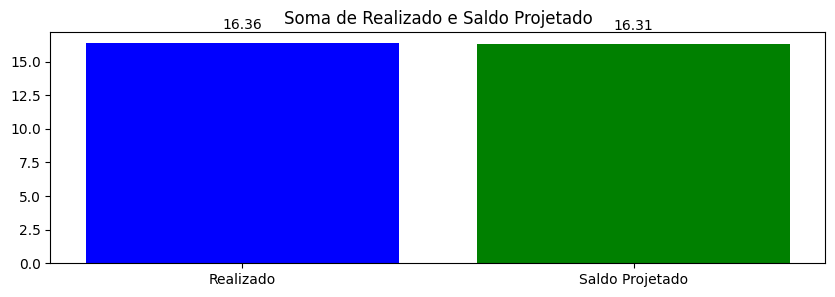

In [ ]:
import matplotlib.pyplot as plt

# Calcular soma de 'Realizado' e 'Saldo projetado'
realizado_sum = df_merge['Realizado'].sum()
saldo_projetado_sum = df_merge['Saldo projetado'].sum()

# Elementos do grafico

fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(['Realizado', 'Saldo Projetado'], [realizado_sum, saldo_projetado_sum], color=['blue', 'green'])

# Etiquetas de dados
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 1.05*height,
            '%0.2f' % float(height),
            ha='center', va='bottom')

plt.title('Soma de Realizado e Saldo Projetado')

# Monstrar gráfico
plt.show()

In [ ]:
16.36/16.31

1.0030656039239731

A meta foi atingida mas por valores bem apertados. 0.3%

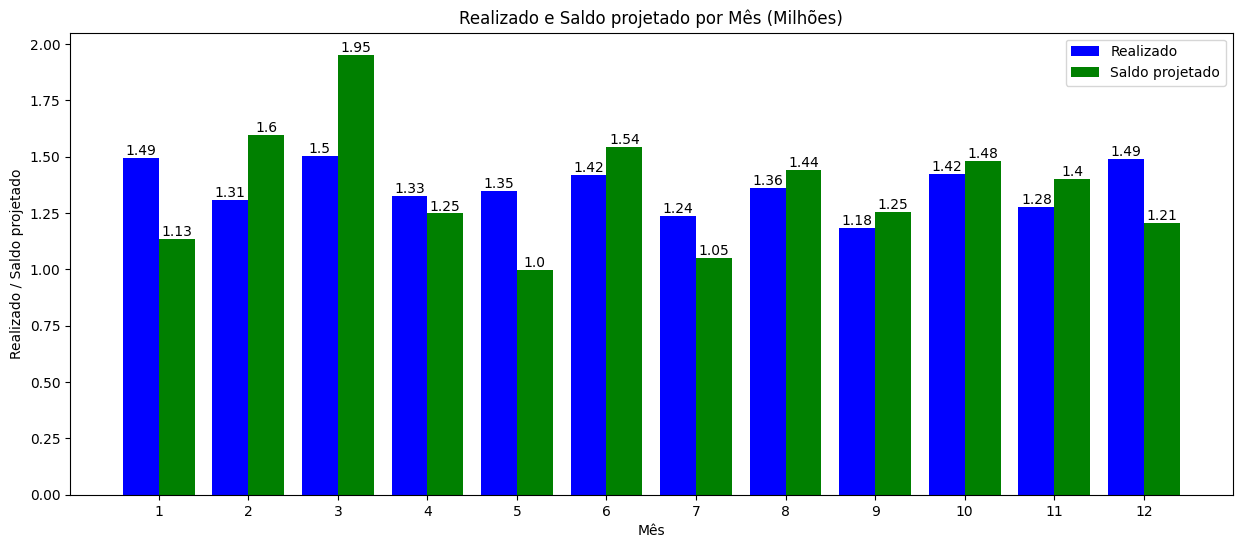

In [ ]:
# Criando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(15, 6))
# Definindo as posições das barras
x = df_merge['Mês']

# Plotando as barras de Realizado
bars_valor = ax1.bar(x - 0.2, df_merge['Realizado'], color='blue', width=0.4, label='Realizado')

# Plotando as barras de Realizado projetada
bars_saldo = ax1.bar(x + 0.2, df_merge['Saldo projetado'], color='green', width=0.4, label='Saldo projetado')

# Adicionando rótulos e título
plt.xlabel('Mês')
plt.ylabel('Realizado / Saldo projetado')
plt.title('Realizado e Saldo projetado por Mês (Milhões)')
plt.xticks(x)

# Adicionando legenda
plt.legend()

# Adicionando rótulos em cima de cada barra
for bar in bars_valor:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars_saldo:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()


**Pontos importantes em Saldo**

* As maiores discrepâncias entre o saldo realizado e o projetado se encontram nos meses 1 à 5 (Modulo).
* O desvio padrão do realizado é menor do que o projetado, sendo respectivamente: 0.104460 e	0.267870.
* A maior diferença se encontra no mes 3, sendo 0.45 milhões.


In [ ]:
# criando dataframe de diferença
df_merge['Diferenca'] = df_merge['Realizado'] - df_merge['Saldo projetado']

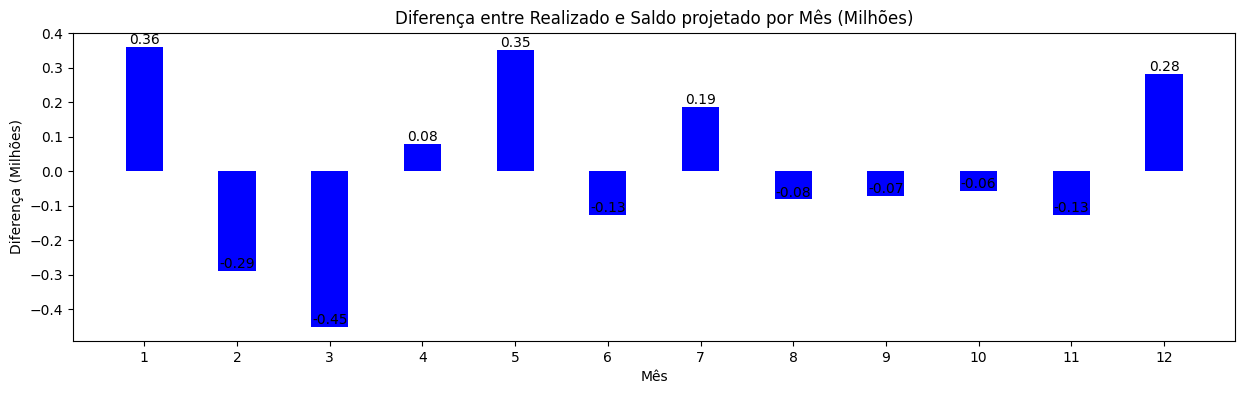

In [ ]:
# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(15, 4))

# Definindo as posições das barras
x = df_merge['Mês']

# Plotando as barras de Diferença
bars = ax.bar(x, df_merge['Diferenca'], color='blue', width=0.4)

# Adicionando rótulos e título
plt.xlabel('Mês')
plt.ylabel('Diferença (Milhões)')
plt.title('Diferença entre Realizado e Saldo projetado por Mês (Milhões)')
plt.xticks(x)

# Adicionando rótulos em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

A projeção dos meses 2 e 3 ficaram bem diferente dos realizado

In [ ]:
df_merge['Diferenca'].mean()

0.004711750000000024

In [ ]:
df_merge['Diferenca'].std()

0.2535367329126546

##Quantidade realizado vs projetado

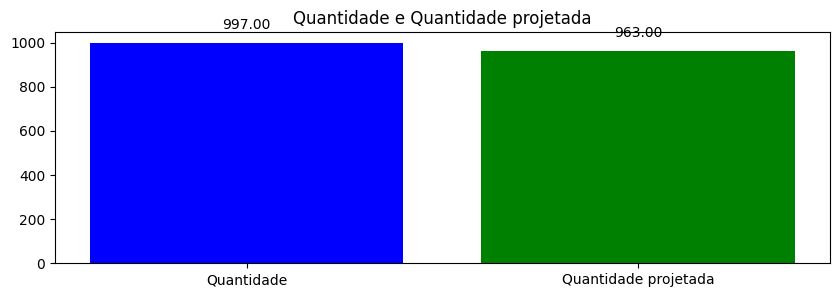

In [ ]:
import matplotlib.pyplot as plt

# Calculado 'Realizado' and 'Quantidade projetado'
qtd = df_merge['Quantidade'].sum()
qtd_projetado_sum = df_merge['Quantidade projetada'].sum()

# Elementos do gráfico

fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(['Quantidade', 'Quantidade projetada'], [qtd, qtd_projetado_sum], color=['blue', 'green'])

# Etiquetas do gráfico
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 1.05*height,
            '%0.2f' % float(height),
            ha='center', va='bottom')

plt.title('Quantidade e Quantidade projetada')

# Exibindo gráfico
plt.show()

In [ ]:
997/963

1.035306334371755

A meta em quantidade foi batida com folga de 3.5%

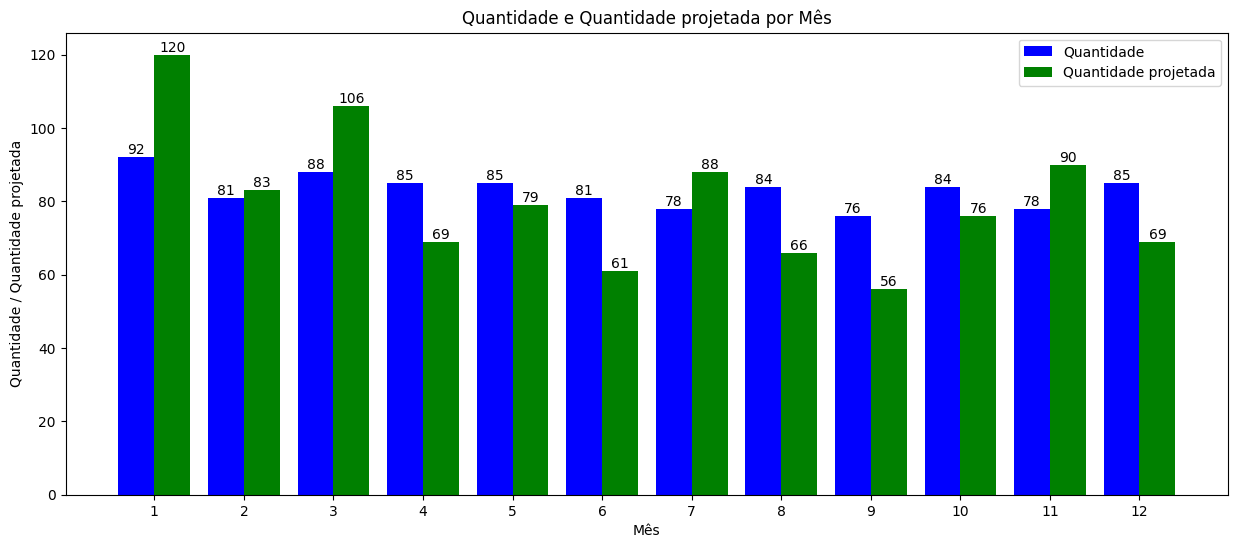

In [ ]:
# Criando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(15, 6))
# Definindo as posições das barras
x = df_merge['Mês']

# Plotando as barras de Valor
bars_valor = ax1.bar(x - 0.2, df_merge['Quantidade'], color='blue', width=0.4, label='Quantidade')

# Plotando as barras de Quantidade projetada
bars_saldo = ax1.bar(x + 0.2, df_merge['Quantidade projetada'], color='green', width=0.4, label='Quantidade projetada')

# Adicionando rótulos e título
plt.xlabel('Mês')
plt.ylabel('Quantidade / Quantidade projetada')
plt.title('Quantidade e Quantidade projetada por Mês')
plt.xticks(x)

# Adicionando legenda
plt.legend()

# Adicionando rótulos em cima de cada barra
for bar in bars_valor:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars_saldo:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

Comparando volume em relação a quantidade vemos que no mes 1 a meta em volume de dinheiro foi batida mas em quantidade não, o que corresponde a um ticket maior

In [ ]:
#criando dataframe com diferença quantidade
df_merge['Diferenca_qtd'] = df_merge['Quantidade'] - df_merge['Quantidade projetada']

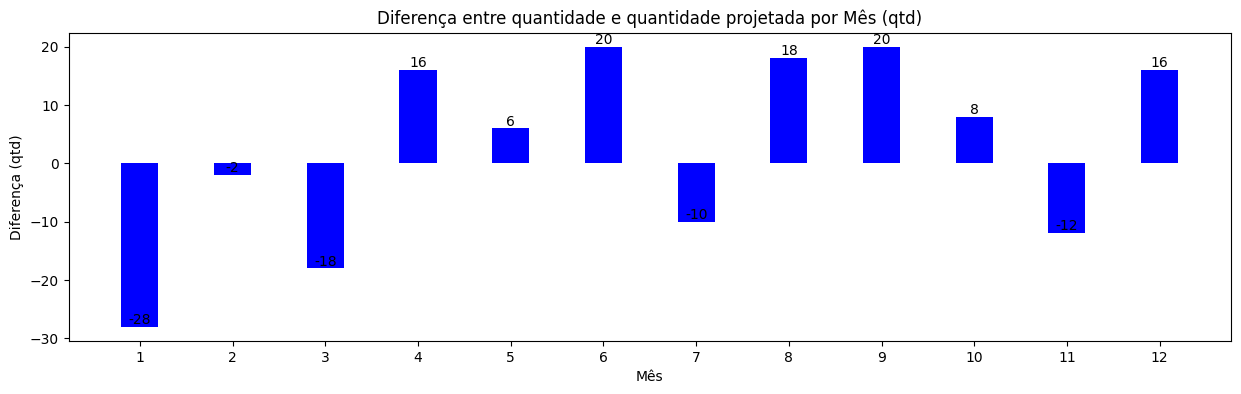

In [ ]:
# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(15, 4))

# Definindo as posições das barras
x = df_merge['Mês']

# Plotando as barras de Diferença
bars = ax.bar(x, df_merge['Diferenca_qtd'], color='blue', width=0.4)

# Adicionando rótulos e título
plt.xlabel('Mês')
plt.ylabel('Diferença (qtd)')
plt.title('Diferença entre quantidade e quantidade projetada por Mês (qtd)')
plt.xticks(x)

# Adicionando rótulos em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

In [ ]:
df_merge['Diferenca_qtd'].mean()

2.8333333333333335

In [ ]:
df_merge['Diferenca_qtd'].std()

16.502525059315417

**Pontos importantes em Quantidade**

* A maior discrepancia esta no mês 1, sendo 28 (qtd).
* O desvio padrão do realizado e projetados consignificativamente difertentes, sendo respectivamente: 4.541893 e	18.684583 (qtd).

#Segmentação

##Segmentação produto

In [ ]:
#tabela mes x produto somando saldo
df_realizado_pivot_T = df_realizado.pivot_table(index='Mês', columns='Produto', values='Saldo Devedor Inicial', aggfunc='sum')/1000000

In [ ]:
df_realizado_pivot_T

Produto,Cartão,Consignado,Crédito Pessoal,Pix,Seguro
Mês,,,,,
1,0.247174,0.252877,0.391838,0.254919,0.348123
2,0.224293,0.354361,0.268878,0.185937,0.275679
3,0.368474,0.284858,0.321279,0.367127,0.159847
4,0.255710,0.323023,0.222033,0.258170,0.268509
5,0.322286,0.316795,0.230504,0.207681,0.271559
6,0.349874,0.259622,0.203142,0.179069,0.425068
7,0.191643,0.240168,0.298299,0.245803,0.259431
8,0.328419,0.250099,0.246234,0.317059,0.218804
9,0.255185,0.312307,0.264987,0.202699,0.147232


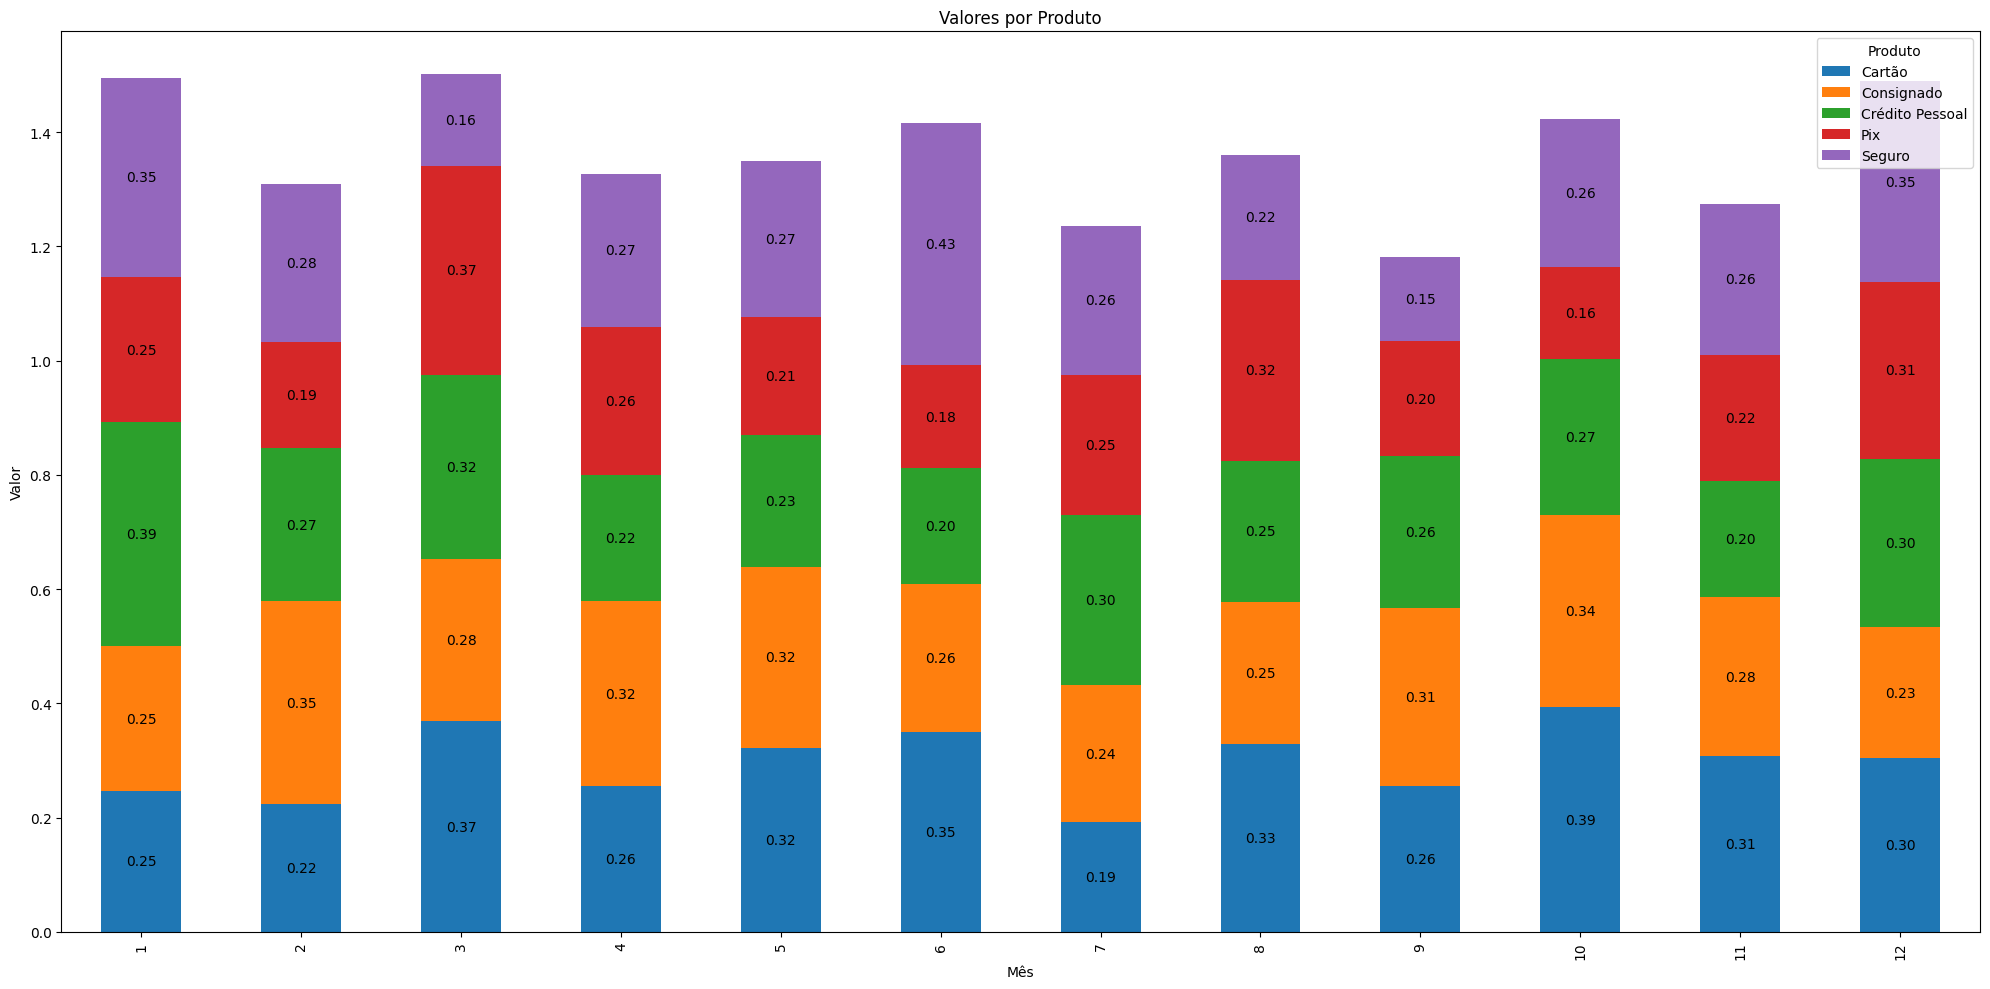

In [ ]:
# Criando gráfico
fig, ax = plt.subplots(figsize=(20, 10))

# Gráfico estacado
df_realizado_pivot_T.plot(kind='bar', stacked=True, ax=ax)

# etiqueta
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.2f}'.format(height),
            horizontalalignment='center',
            verticalalignment='center')

# Informações do gráfico
ax.set_xlabel("Mês")
ax.set_ylabel("Valor")
ax.set_title("Valores por Produto")

# Ajustando layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

Crédito pessoal performou melhor nos meses 1 e 3 do que os outros produtos. (verificar motivo desse aumento significativo)  
O seguro teve grande influencia nos resultados 1 e 6. (verificar o motivo desse aumento: marketing, operações, influencias externas ...)


In [ ]:
total_per_product = df_realizado_pivot_T.sum(axis=0)
total_per_product

,0
Produto,
Cartão,3.548659
Consignado,3.437517
Crédito Pessoal,3.218893
Pix,2.910516
Seguro,3.248901


Cartão e consignado foram os que mais influenciaram positivamente para o comprimento da meta.

In [ ]:
total_per_product.sum()

16.364486667844

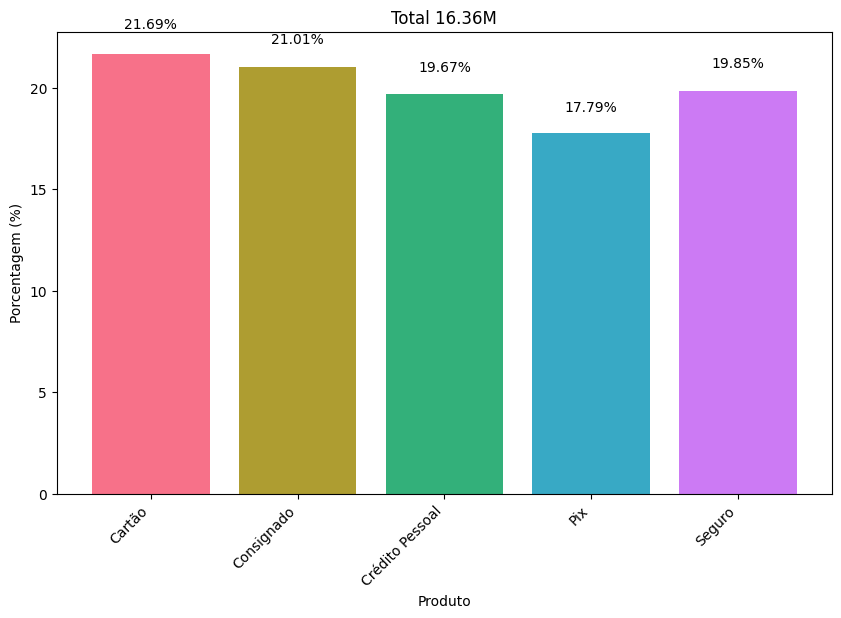

In [ ]:
# Calculado %
total_sum = total_per_product.sum()
percentages = (total_per_product / total_sum) * 100

# Criando barras
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(percentages.index, percentages.values, color=sns.color_palette("husl", len(percentages)))

# Adicionando etiquetas nas barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 1.05*height,
            f'{height:.2f}%',
            ha='center', va='bottom')

# Informaçoes do gráfico
plt.xlabel("Produto")
plt.ylabel("Porcentagem (%)")
plt.title("Total 16.36M")

# Rotacionando as etiquetas dos eixos
plt.xticks(rotation=45, ha='right')

# Mostrando o gráfico
plt.show()


In [ ]:
#informação da tabela geradora do gráfico
df_realizado_pivot_T.describe()

Produto,Cartão,Consignado,Crédito Pessoal,Pix,Seguro
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.295722,0.286460,0.268241,0.242543,0.270742
std,0.061268,0.041228,0.054279,0.062455,0.078041
min,0.191643,0.228575,0.202245,0.161575,0.147232
25%,0.253182,0.252182,0.228386,0.198508,0.248070
50%,0.306113,0.281920,0.266932,0.233719,0.266733
75%,0.333783,0.318352,0.296055,0.270838,0.293790
max,0.393375,0.354361,0.391838,0.367127,0.425068


* Cartão, teve a maior média
* Consignado, teve o menor desvio padrão (consistencia)
* Seguro, teve maior desvio padrão

##Segmentação IF

In [ ]:
#Criando segmentação de IF por produto
df_IF_pivot = df_realizado.pivot_table(index='IF', columns='Produto', values='Saldo Devedor Inicial', aggfunc='sum')/1000
df_IF_pivot['Total'] = df_IF_pivot.sum(axis=1)
df_IF_pivot.sort_values(by='Total', ascending=False, inplace=True)
df_IF_pivot.head(10)

Produto,Cartão,Consignado,Crédito Pessoal,Pix,Seguro,Total
IF,,,,,,
36,25.810750,45.082150,51.004743,71.643711,30.555667,224.097020
71,54.222836,39.304555,68.202834,31.517262,14.259395,207.506884
153,22.659804,46.863350,95.596925,14.574452,5.212372,184.906903
52,32.759031,50.293094,50.413598,5.793826,42.544607,181.804157
50,39.475328,4.334079,NaN,91.919359,38.928936,174.657701
95,NaN,39.622855,29.431147,47.562537,50.585718,167.202257
175,30.036696,3.624010,31.756627,45.504242,54.073931,164.995507
109,48.987623,2.135843,34.994639,35.680953,41.541534,163.340593
110,19.532932,12.560100,48.646181,77.204689,5.265159,163.209062


In [ ]:
df_IF_pivot = df_IF_pivot.head(10)

<Figure size 1400x1200 with 0 Axes>

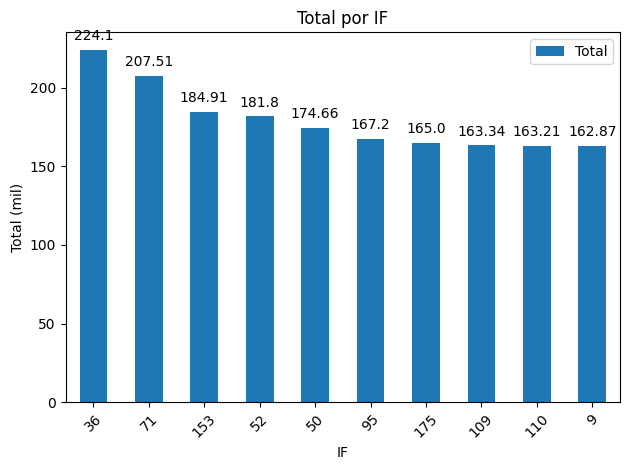

In [ ]:
# Criando gráfico de barras
plt.figure(figsize=(14, 12))  # Ajuste de tamanho da imagem
ax = df_IF_pivot.plot(kind='bar', y='Total')

# Adicionando etiquetas as barras
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Criando informações do gráfico
plt.xlabel("IF")
plt.ylabel("Total (mil)")
plt.title("Total por IF")
plt.xticks(rotation=45)  # Rotação das etiquedas dos eixos
plt.tight_layout()  # Ajuste de gráfico para melhor visualização
plt.show()


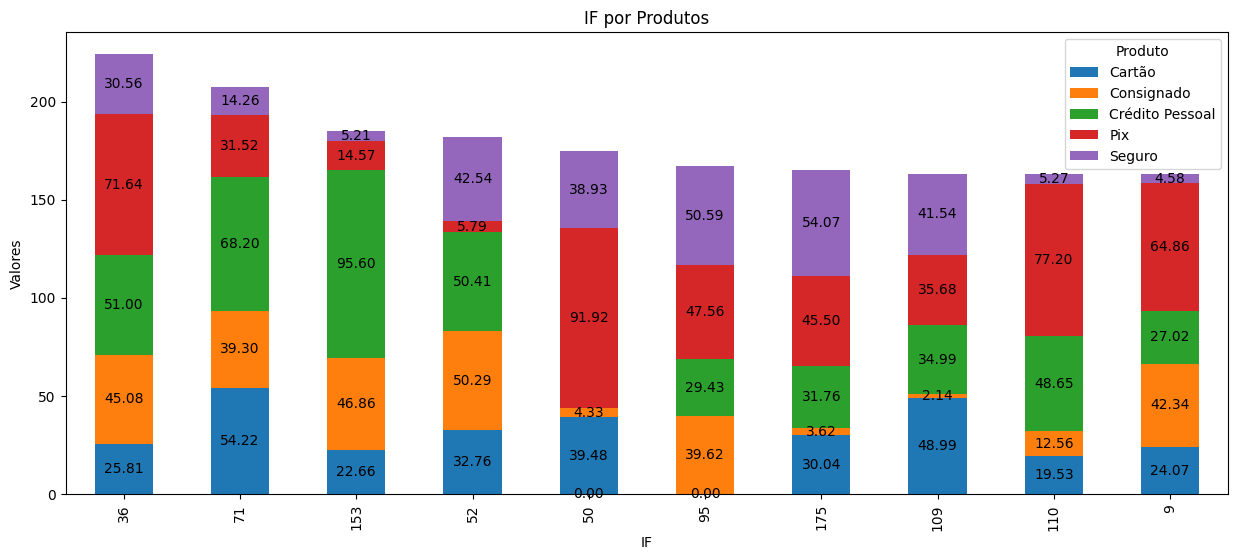

In [ ]:
# Criando gráfico
ax = df_IF_pivot[['Cartão', 'Consignado', 'Crédito Pessoal', 'Pix', 'Seguro']].plot(kind='bar', stacked=True, figsize=(15, 6)) #removed x and y arguments since the x-axis is the index by default, and the y axis is all other columns.

# Adicionando etiquetas as barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center')

# Criando informações do gráfico
plt.title('IF por Produtos')
plt.xlabel('IF')
plt.ylabel('Valores')

# Mostrando o gráfico
plt.show()

Criei segmentação dos maiores IF por produto, pois ajuda a compreender quais produtos foram mais convertidos. Exemplo: IF 36 e 50 teve maior volume de crédito em pix. 153 teve maior volume em crédito pessoal...

##Faixa

In [ ]:
#criando faixas de saldos
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000,100000000000]
df_realizado['Faixa Saldo'] = pd.cut(df_realizado['Saldo Devedor Inicial'], bins=bins)
df_realizado.head()

,Ano,Mês,Data,Produto,Cliente,Taxa,Prazo Atual,Parcelas Pagas,IF,PMT,Saldo Devedor Inicial,Saldo Devedor Atual,Faixa Saldo
0,2023,10,2023-10-15,Cartão,609,0.0150,69,15,99,204.47,9728.403092,8751.764792,"(5000, 10000]"
1,2023,2,2023-02-09,Cartão,387,0.0176,18,66,197,250.92,10964.162230,3842.404097,"(10000, 15000]"
2,2023,9,2023-09-27,Cartão,396,0.0187,27,57,44,563.24,23767.030230,11855.545610,"(20000, 25000]"
3,2023,8,2023-08-04,Seguro,43,0.0180,2,82,107,273.32,11791.431200,532.227141,"(10000, 15000]"
4,2023,6,2023-06-30,Cartão,214,0.0095,73,11,36,447.39,25810.749550,23477.970900,"(25000, 30000]"


In [ ]:
#Contagem de elementos dentro de faixas de saldo
count_faixa_saldo = df_realizado['Faixa Saldo'].value_counts()
count_faixa_saldo

,count
Faixa Saldo,
"(15000, 20000]",208
"(10000, 15000]",189
"(20000, 25000]",180
"(5000, 10000]",164
"(25000, 30000]",118
"(0, 5000]",91
"(30000, 100000000000]",47


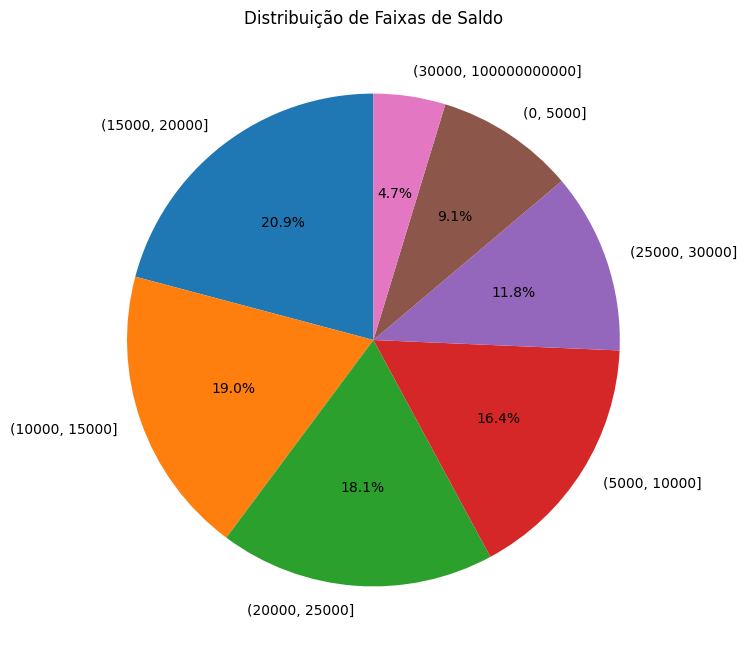

In [ ]:
# Criando gráfico pizza
plt.figure(figsize=(8, 8))  # Ajusta o tamanho caso seja necessário
plt.pie(count_faixa_saldo.values, labels=count_faixa_saldo.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Faixas de Saldo')
plt.show()

As faixa mais impactantes se encontram entre 5000 a 25000

In [ ]:
Ticket_medio = df_realizado['Saldo Devedor Inicial'].mean()
Ticket_medio

16413.72785139819

#Informações carteira

##Operações por produto

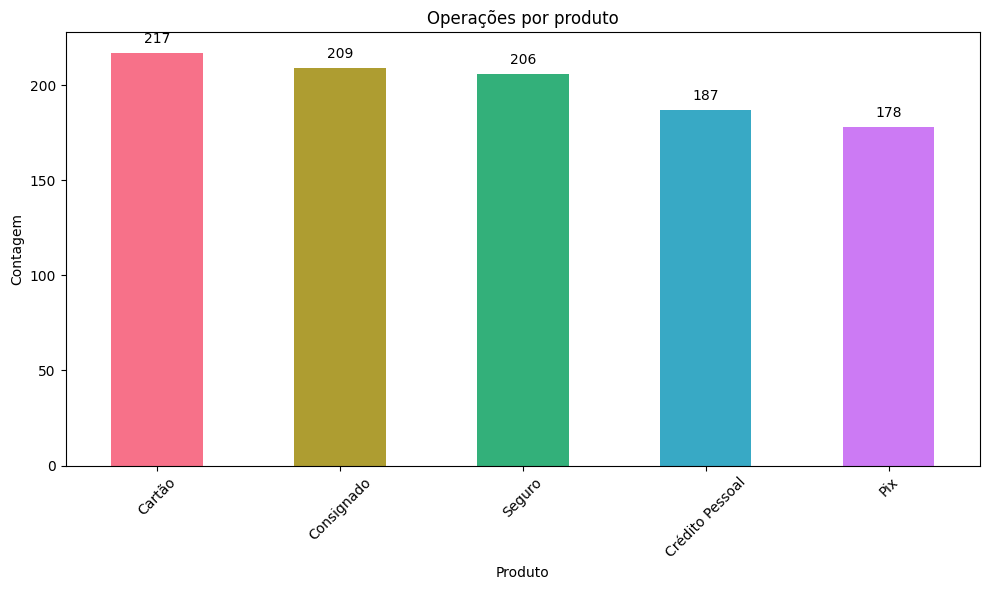

In [ ]:
#Contagem de operações por produto
product_counts = df_realizado['Produto'].value_counts()

# Criando gráfico
plt.figure(figsize=(10, 6))  # Ajuste de tamanho caso seja necessário
ax = product_counts.plot(kind='bar', color=sns.color_palette("husl", len(product_counts)))

# Adicionando etiqueta nas barras
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.xlabel("Produto")
plt.ylabel("Contagem")
plt.title("Operações por produto")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout for better readability
plt.show()

##Evolução saldo

In [ ]:
# Criando dataframe com valores acumulados
df_realizado_acumulado = df_realizado.groupby('Mês').agg({'Saldo Devedor Inicial': 'sum', 'Saldo Devedor Atual': 'sum'})

# Calculando valor acumulado por mes
df_realizado_acumulado['Saldo Devedor Inicial Acumulado'] = df_realizado_acumulado['Saldo Devedor Inicial'].cumsum()/1000000
df_realizado_acumulado['Saldo Devedor Atual Acumulado'] = df_realizado_acumulado['Saldo Devedor Atual'].cumsum()/1000000

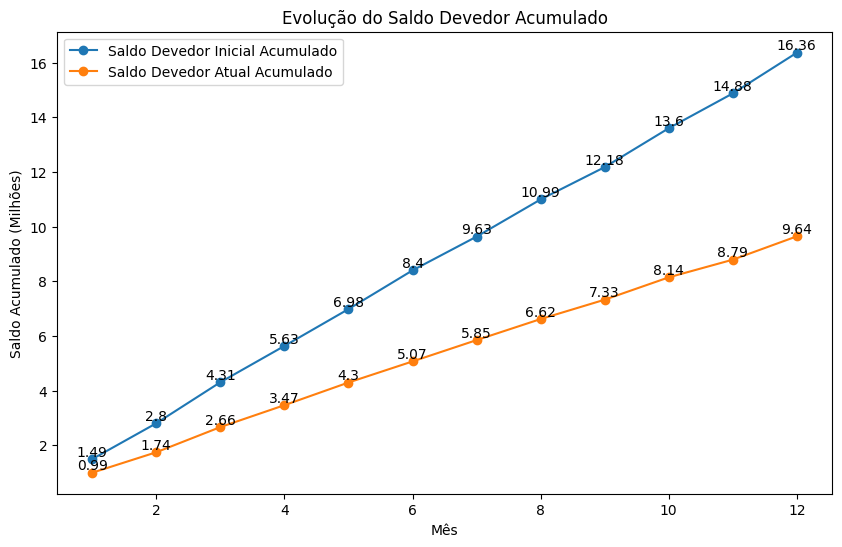

In [ ]:
# Criando gráfico
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# criando linhas
plt.plot(df_realizado_acumulado.index, df_realizado_acumulado['Saldo Devedor Inicial Acumulado'], marker='o', label='Saldo Devedor Inicial Acumulado')
plt.plot(df_realizado_acumulado.index, df_realizado_acumulado['Saldo Devedor Atual Acumulado'], marker='o', label='Saldo Devedor Atual Acumulado')

# Adicionando etiquetas aos pontos
for x, y in zip(df_realizado_acumulado.index, df_realizado_acumulado['Saldo Devedor Inicial Acumulado']):
    plt.text(x, y, str(round(y, 2)), ha='center', va='bottom')

for x, y in zip(df_realizado_acumulado.index, df_realizado_acumulado['Saldo Devedor Atual Acumulado']):
    plt.text(x, y, str(round(y, 2)), ha='center', va='bottom')

# Informações sobre o gráfico
plt.xlabel("Mês")
plt.ylabel("Saldo Acumulado (Milhões)")
plt.title("Evolução do Saldo Devedor Acumulado")
plt.legend()

# Monstrando gráfico
plt.show()

In [ ]:
# Agrupando por mês e calcular a soma de 'Saldo Devedor Inicial' e 'Saldo Devedor Atual'
df_saldo_por_mes = df_realizado.groupby('Mês').agg(
    Saldo_Devedor_Inicial=('Saldo Devedor Inicial', 'sum'),
    Saldo_Devedor_Atual=('Saldo Devedor Atual', 'sum')
)

df_saldo_por_mes = df_saldo_por_mes/1000000

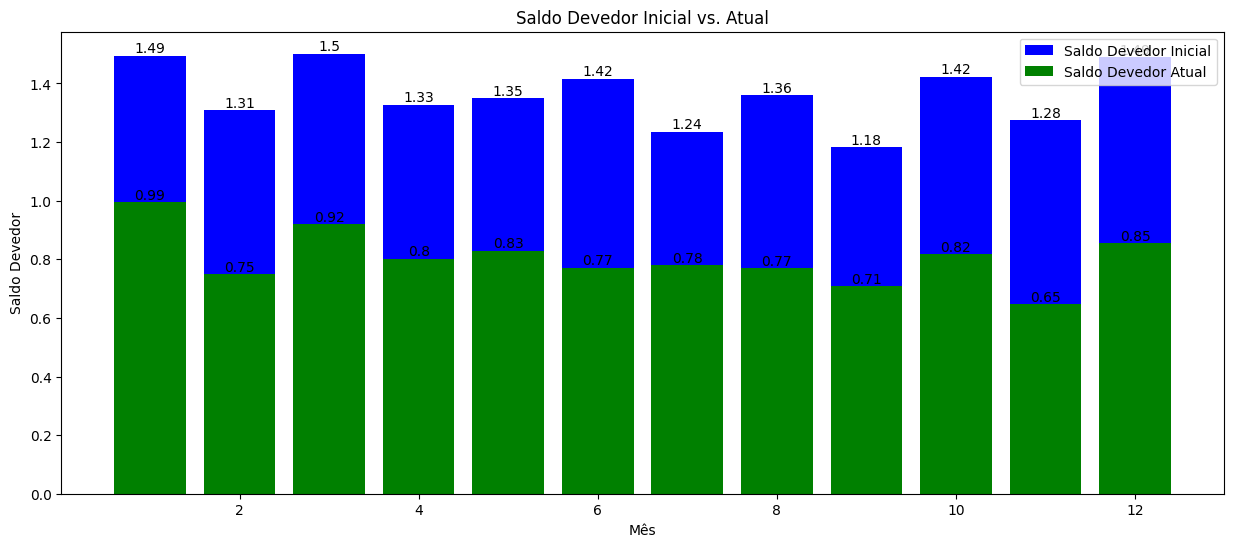

In [ ]:
# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(15, 6))

# Plotar as barras para Saldo_Devedor_Inicial
ax.bar(df_saldo_por_mes.index, df_saldo_por_mes['Saldo_Devedor_Inicial'], color='blue', label='Saldo Devedor Inicial')

# Plotar as barras para Saldo_Devedor_Atual
ax.bar(df_saldo_por_mes.index, df_saldo_por_mes['Saldo_Devedor_Atual'], color='green', label='Saldo Devedor Atual')

# Adicionar rótulos acima das barras
for i in df_saldo_por_mes.index:
    ax.text(i, df_saldo_por_mes['Saldo_Devedor_Inicial'][i], str(round(df_saldo_por_mes['Saldo_Devedor_Inicial'][i], 2)), ha='center', va='bottom')
    ax.text(i, df_saldo_por_mes['Saldo_Devedor_Atual'][i], str(round(df_saldo_por_mes['Saldo_Devedor_Atual'][i], 2)), ha='center', va='bottom')

# Adicionar título e legendas
plt.title('Saldo Devedor Inicial vs. Atual')
plt.xlabel('Mês')
plt.ylabel('Saldo Devedor')
plt.legend()

# Mostrar o gráfico
plt.show()

##Juros por parcela

In [ ]:
#Tabela de parcela por produto
df_taxa_parcela = df_realizado.groupby('Produto').agg(Taxa_produto = ('Taxa', 'mean'), Parcela_produto = ('PMT', 'mean'))
df_taxa_parcela['Parcela_produto'] = df_taxa_parcela['Parcela_produto'].astype(np.float16)
df_taxa_parcela['Taxa_produto'] = df_taxa_parcela['Taxa_produto']*100

In [ ]:
df_taxa_parcela

,Taxa_produto,Parcela_produto
Produto,,
Cartão,1.447281,336.75
Consignado,1.475407,337.75
Crédito Pessoal,1.433209,349.50
Pix,1.391854,328.75
Seguro,1.450146,321.75


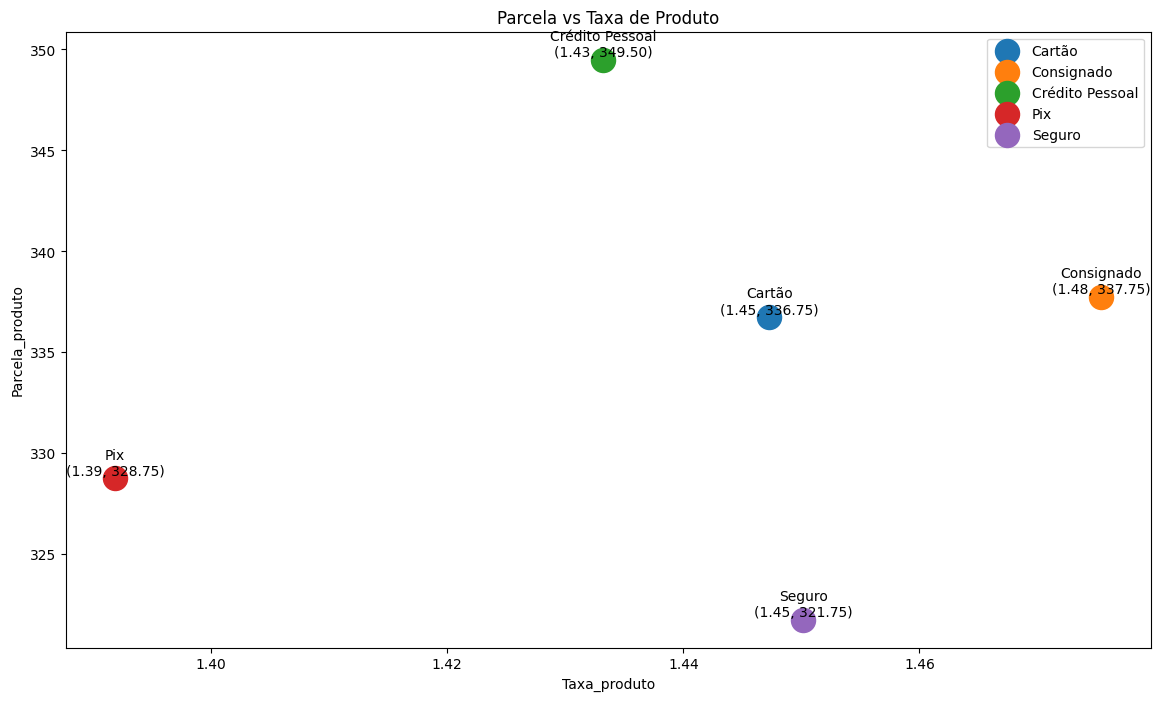

In [ ]:
# Criar o gráfico de dispersão
plt.figure(figsize=(14, 8))  # Define o tamanho da figura

# Plotar os pontos com cores diferentes para cada produto
# Iterar sobre o índice do DataFrame
for produto in df_taxa_parcela.index:
    subset = df_taxa_parcela.loc[[produto]] # Selecionar a linha com base no índice
    plt.scatter(subset['Taxa_produto'], subset['Parcela_produto'], label=produto, s=300)

    # Adicionar rótulos nos pontos
    for i, row in subset.iterrows():
        plt.text(row['Taxa_produto'], row['Parcela_produto'],
                 f"{produto}\n({row['Taxa_produto']:.2f}, {row['Parcela_produto']:.2f})",
                 ha='center', va='bottom')

# Adicionar título e rótulos dos eixos
plt.title('Parcela vs Taxa de Produto')
plt.xlabel('Taxa_produto')
plt.ylabel('Parcela_produto')

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

* Consignado possui maior juros
* Credito pessoal possui maior valor de parcela
* Pix possui menor juros

##Saldo restante por produto

In [ ]:
df_realizado.head()

,Ano,Mês,Data,Produto,Cliente,Taxa,Prazo Atual,Parcelas Pagas,IF,PMT,Saldo Devedor Inicial,Saldo Devedor Atual,Faixa Saldo
0,2023,10,2023-10-15,Cartão,609,0.0150,69,15,99,204.47,9728.403092,8751.764792,"(5000, 10000]"
1,2023,2,2023-02-09,Cartão,387,0.0176,18,66,197,250.92,10964.162230,3842.404097,"(10000, 15000]"
2,2023,9,2023-09-27,Cartão,396,0.0187,27,57,44,563.24,23767.030230,11855.545610,"(20000, 25000]"
3,2023,8,2023-08-04,Seguro,43,0.0180,2,82,107,273.32,11791.431200,532.227141,"(10000, 15000]"
4,2023,6,2023-06-30,Cartão,214,0.0095,73,11,36,447.39,25810.749550,23477.970900,"(25000, 30000]"


In [ ]:
df_saldo_restante = df_realizado.groupby('Produto').agg(Saldo_realizado = ('Saldo Devedor Inicial', 'sum'), Saldo_restante = ('Saldo Devedor Atual', 'sum'))
df_saldo_restante['Saldo_realizado'] = (df_saldo_restante['Saldo_realizado']/1000000).round(2)
df_saldo_restante['Saldo_restante'] = (df_saldo_restante['Saldo_restante']/1000000).round(2)
df_saldo_restante['%'] = df_saldo_restante['Saldo_restante']/df_saldo_restante['Saldo_realizado']*100

In [ ]:
df_saldo_restante

,Saldo_realizado,Saldo_restante,%
Produto,,,
Cartão,3.55,2.10,59.154930
Consignado,3.44,2.04,59.302326
Crédito Pessoal,3.22,1.88,58.385093
Pix,2.91,1.77,60.824742
Seguro,3.25,1.85,56.923077


<ipython-input-140-11aa53a6f5a6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i - width/2, df_saldo_restante['Saldo_realizado'][i], str(round(df_saldo_restante['Saldo_realizado'][i], 2)), ha='center', va='bottom')
<ipython-input-140-11aa53a6f5a6>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i + width/2, df_saldo_restante['Saldo_restante'][i], str(round(df_saldo_restante['Saldo_restante'][i], 2)), ha='center', va='bottom')


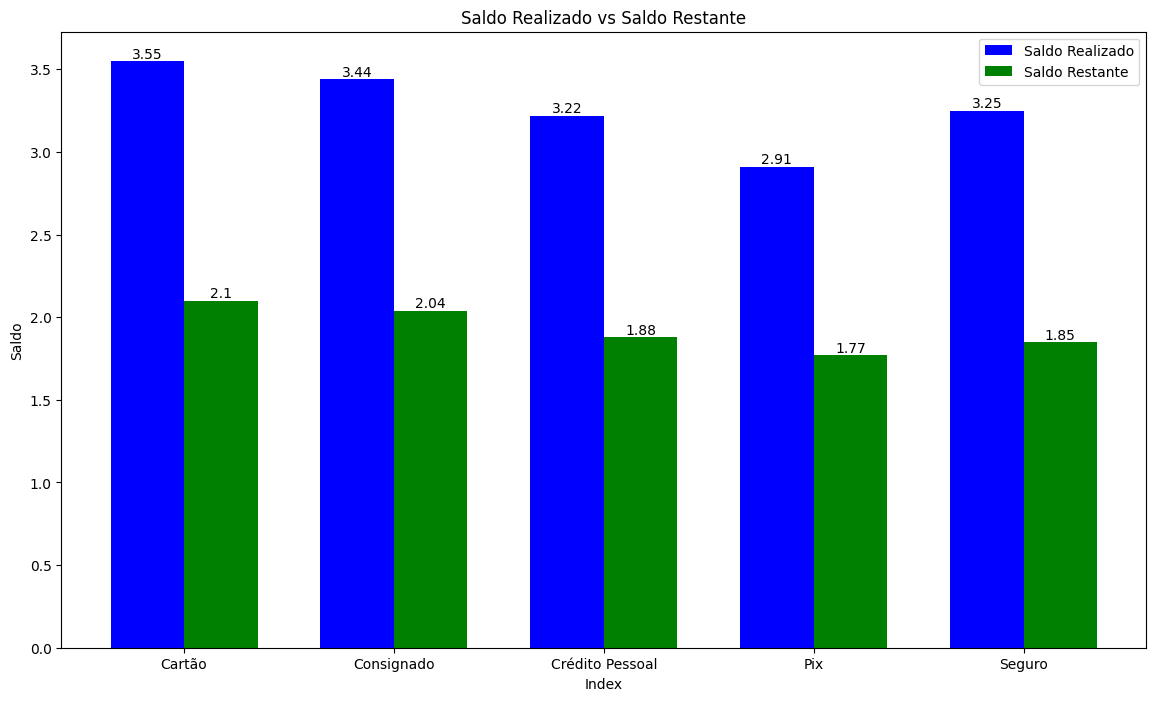

In [ ]:
import matplotlib.pyplot as plt

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(14, 8))
x = range(len(df_saldo_restante.index))
width = 0.35
ax.bar([i - width/2 for i in x], df_saldo_restante['Saldo_realizado'], width, label='Saldo Realizado', color='blue') # Convert the range object to a list by using list comprehension before performing the subtraction.
ax.bar([i + width/2 for i in x], df_saldo_restante['Saldo_restante'], width, label='Saldo Restante', color='green') # Convert the range object to a list by using list comprehension before performing the addition.

# Adicionar rótulos em cima das barras
for i in range(len(df_saldo_restante)):
    ax.text(i - width/2, df_saldo_restante['Saldo_realizado'][i], str(round(df_saldo_restante['Saldo_realizado'][i], 2)), ha='center', va='bottom')
    ax.text(i + width/2, df_saldo_restante['Saldo_restante'][i], str(round(df_saldo_restante['Saldo_restante'][i], 2)), ha='center', va='bottom')

# Configurar o gráfico
ax.set_xlabel('Index')
ax.set_ylabel('Saldo')
ax.set_title('Saldo Realizado vs Saldo Restante')
ax.set_xticks(x) # Set the tick positions
ax.set_xticklabels(df_saldo_restante.index) # Set the tick labels
ax.legend()
plt.show()

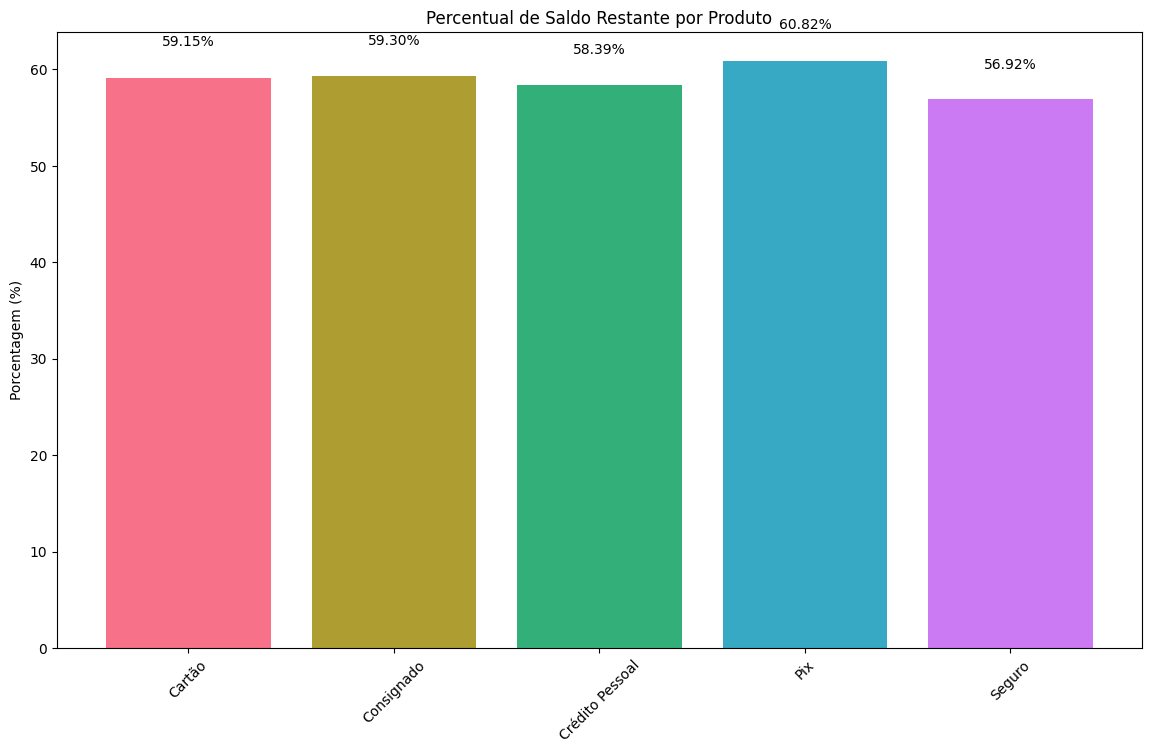

In [ ]:
# prompt: usando df_saldo_restante criar grafico de barras de % por index, usar matplotlib, com rotulos em cima de cada barra, cores diferentes

import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(14, 8))

# Criar a paleta de cores
colors = sns.color_palette("husl", len(df_saldo_restante.index))

# Plotar as barras
bars = ax.bar(df_saldo_restante.index, df_saldo_restante['%'], color=colors)

# Adicionar rótulos em cima das barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 1.05*height,
            f'{height:.2f}%',
            ha='center', va='bottom')

# Configurar o gráfico
ax.set_ylabel('Porcentagem (%)')
ax.set_title('Percentual de Saldo Restante por Produto')
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()

#Conclusão

Ambas as metas de volume e quantidade foram batidas, entretanto houve meses em que as metas não ficaram compativeis com o realizado

* Nos meses 2, 3, 6, e 8 á 11 as metas de volumes não foram batidas

* Nos meses 1 2 3 7 11 as metas de quantidade não foram batidas

Analisar se houve diferença na metodologia, número de ações ou influências externas.

Na segmentação de valores do produto por meses existem pontos que podem ser explorados como: IF 153 possui volume de crédito pessoal com volume consideravelmente maior, qual o motivo?

Em IF 110 o pix superou bastante os outros produtos, porquê?

Temos dados dos cliente convertidos? se sim é possivel fazer Score?

Webscraping. (informação de concorrentes atualizada)

Quantificar eficiencia de marketing (ROI)

Entender de onde vem maior lucro por valor investido. (incluindo inadimplencia dos produtos)